# Time Series - Lecture 4: Deep Learning for Time Series Forecasting

ARIMA model is well understood and effective in many cases. However, there are cases where ARIMA model is limiting:
1. Missing or corrupt data
2. Non-linear relationships
3. The number of lag observations differ across data
4. Multiple input variables

In such cases, more flexible model can be a better. Today we will learn a few flexible deep learning models. Namely,

1. **Deep Neural Network (DNN)**
2. **Long Short-Term Memory (LSTM) Neural Network**

**Data**

Since the Deep Learning models covered today are supervised learning, we need X and Y variables. We will convert our Google trends data into an appropriate shape.

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
df = pd.read_csv('data/multiTimeline.csv', skiprows=1)
df.columns = ['month', 'diet', 'gym', 'finance']
df.month = pd.to_datetime(df.month)
df.set_index('month', inplace=True)
df.head()
df = df.diet

,diet,gym,finance
month,,,
2004-01-01,100,31,48
2004-02-01,75,26,50
2004-03-01,72,26,45
2004-04-01,69,22,47
2004-05-01,73,22,43


In [ ]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

In [140]:
def convert2matrix(data_arr, look_back):
 X, Y =[], []
 for i in range(len(data_arr)-look_back):
  d=i+look_back  
  X.append(data_arr[i:d])
  Y.append(data_arr[d])
 return np.array(X), np.array(Y)

train_size = round(len(df)*.6)
train, test =df.values[0:train_size],df.values[train_size:len(df.values)]
look_back = 3
trainX, trainY = convert2matrix(train, look_back)
testX, testY = convert2matrix(test, look_back)

## Deep Neural Network (DNN)
- Neural network is a create a model of the brain
- A neuron has a weighted input signals and produce an output signal using an activation function
- Multiple rows of neurons are arranged into neural networks 

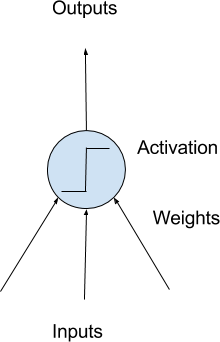

In [35]:
from PIL import Image
Image.open("images/Neuron.png")

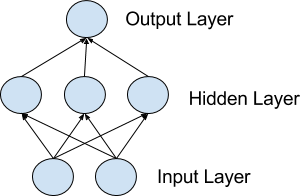

In [36]:
Image.open("images/Network.png")

In [23]:
from keras.models import Sequential
from keras.layers import Dense

In [141]:
from keras.models import Sequential
from keras.layers import Dense
def model_dnn(look_back):
    model=Sequential()
    model.add(Dense(units=32, input_dim=look_back, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error',  optimizer='adam',metrics = ['mse', 'mae'])
    return model

In [142]:
model=model_dnn(look_back)
history=model.fit(trainX,trainY, epochs=2000, verbose=0)

In [143]:
train_predict = model.predict(trainX)
test_predict = model.predict(testX)

In [147]:
def prediction_plot(testY, test_predict):
   len_prediction=[x for x in range(len(testY))]
   plt.figure(figsize=(8,4))
   plt.plot(len_prediction, testY, marker='.', label="actual")
   plt.plot(len_prediction, test_predict, 'r', label="prediction")
   plt.tight_layout()
   plt.subplots_adjust(left=0.07)
   plt.ylabel('Diet', size=15)
   plt.xlabel('Time step', size=15)
   plt.legend(fontsize=15)
   plt.show();

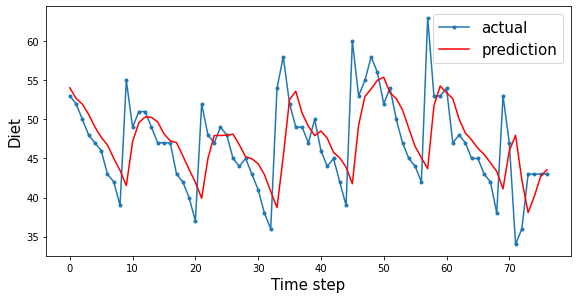

In [148]:
prediction_plot(testY, test_predict)

## Long Short-Term Memory Network (LSTM) 

- Instead of neurons, LSTM networks have **memory blocks** that are connected through layers.
- A block has components that make it smarter* than a classical neuron

*For details on how "smart" each block is, refer [here](http://colah.github.io/posts/2015-08-Understanding-LSTMs/).

In [152]:
def convert2matrix(data_arr, look_back):
   X, Y =[], []
   for i in range(len(data_arr)-look_back):
       d=i+look_back  
       X.append(data_arr[i:d,])
       Y.append(data_arr[d,])
   return np.array(X), np.array(Y)

In [153]:
from sklearn.preprocessing import MinMaxScaler
df_arr = np.reshape(df.values, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 1))#LTSM is senstive to the scale of features
df_arr = scaler.fit_transform(df_arr)

In [154]:
train_size = round(len(df)*0.6)
test_size = len(df_arr)-train_size
train, test = df_arr[0:train_size,:], df_arr[train_size:len(df_arr),:]
look_back = 3
trainX, trainY = convert2matrix(train, look_back)
testX, testY = convert2matrix(test, look_back)
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [155]:
from keras.layers import Dense, LSTM, Dropout
def model_lstm(look_back):
    model=Sequential()
    model.add(LSTM(100, input_shape=(1, look_back), activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error',  optimizer='adam',metrics = ['mse', 'mae'])
    return model

In [156]:
model=model_lstm(look_back)
history=model.fit(trainX,trainY, epochs=100, verbose=0)

In [157]:
train_predict = model.predict(trainX)
test_predict = model.predict(testX)

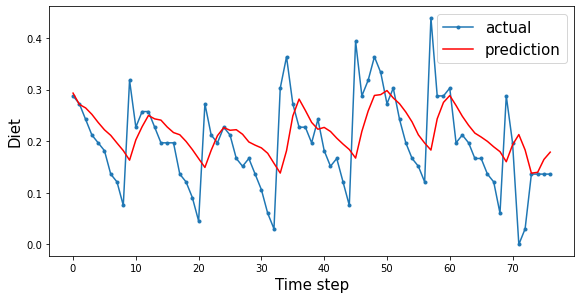

In [158]:
prediction_plot(testY, test_predict)

# Activities

1. Read the following:
    - https://machinelearningmastery.com/neural-networks-crash-course/
    - https://machinelearningmastery.com/crash-course-convolutional-neural-networks/
    - https://machinelearningmastery.com/crash-course-recurrent-neural-networks-deep-learning/
2. Can you create one of the three models that we have studied today with your data set? Why did you choose a particular model?

# References
- https://machinelearningmastery.com/how-to-get-started-with-deep-learning-for-time-series-forecasting-7-day-mini-course/
- https://machinelearningmastery.com/neural-networks-crash-course/
- https://machinelearningmastery.com/crash-course-convolutional-neural-networks/
- http://colah.github.io/posts/2015-08-Understanding-LSTMs/
- https://towardsdatascience.com/a-quick-deep-learning-recipe-time-series-forecasting-with-keras-in-python-f759923ba64